In [1]:
import matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

from matplotlib import rc
rc('text', usetex=True)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from mpl_toolkits.axes_grid1 import make_axes_locatable
###########################################
def z_avg(data_u):
    import numpy as np
    m,n,p = data_u.shape
    const=1.0/float(m)
    data_avg_u = np.zeros((n,p))
    
    for idz in range(m):
        data_avg_u[:,:]+= data_u[idz,:,:]
        
    data_avg_u *= const
    return data_avg_u
#############################################

#############################################

def zy_avg(data_u):
    import numpy as np
    m,n,p = data_u.shape
    const=1.0/float(m*n)
    data_avg_ux = np.zeros((p))
    
    for idz in range(m):
        for idy in range(n):
            data_avg_ux[:]+= data_u[idz,idy,:]
        
    data_avg_ux *= const
    return data_avg_ux
############################################
###################################################################
Nx,Ny,Nz=0,0,0
yD = []
def htps_turbine_reader(Pathname,D,if_disc,filebase,sigma_list):
    global Nx, Ny, Nz, yD

    if not if_disc:
        filename=Pathname+'/'+filebase+'_spanwise.out'
        Nx,Ny,Nz = 513,8,257
    else:
        filename=Pathname+'/'+filebase+'_disc.out'
        Nx,Ny,Nz = 513,8,61*3
        
    data=np.loadtxt(filename,skiprows=1,usecols=(1,2,3))
    Nyz,N_slice = Ny*Nz,Nx*Ny*Nz
    data_x1,data_y1,data_z1 = data[0:N_slice,0], data[0:N_slice,1],data[0:N_slice,2]
    # first slot of reshape: 1d --> 2d
    sp,s,sy= (Nyz,Nx),(Nz,Ny,Nx),(Nz,Ny)
    data_x1rs, data_y1rs, data_z1rs = data_x1.reshape(sp,order='F'),data_y1.reshape(sp,order='F'),data_z1.reshape(sp,order='F')

# first slot of reshape: 2d --> 3d
# the array data[] needs to sliced
# Have TKE [0] and dissipation [1] and uvms [2] data 
    data_x1rst,data_y1rst,data_z1rst = np.zeros(s),np.zeros(s),np.zeros(s)
    temp = np.zeros(sy)
# broadcasting of the arrays are necessary in order to get the data_x1rs fit into data_x1rst
    for idx in range(Nx):
        temp1,temp2,temp3 = data_x1rs[:,idx],data_y1rs[:,idx],data_z1rs[:,idx]
        data_x1rst[:,:,idx],data_y1rst[:,:,idx],data_z1rst[:,:,idx] = temp1.reshape(sy,order='F'),temp2.reshape(sy,order='F'),temp3.reshape(sy,order='F')

# statistical z_averages from the data 
################################################################################
    datax1_avg,datay1_avg,dataz1_avg = z_avg(data_x1rst),z_avg(data_y1rst),z_avg(data_z1rst)
    
## Gaussian Filtering
    dummy = gaussian_filter1d(datax1_avg[0,:],sigma=2.5)
    datax1_avg_smooth = np.zeros((Ny,len(dummy)))
    datay1_avg_smooth = np.zeros((Ny,len(dummy)))
    dataz1_avg_smooth = np.zeros((Ny,len(dummy)))

    for i in range(Ny):
        datax1_avg_smooth[i,:] = gaussian_filter1d(datax1_avg[i,:],sigma=sigma_list[0])
        datay1_avg_smooth[i,:] = gaussian_filter1d(datay1_avg[i,:],sigma=sigma_list[1])
        dataz1_avg_smooth[i,:] = gaussian_filter1d(dataz1_avg[i,:],sigma=sigma_list[2])
        
    # location of y stations
    y = np.array([-0.95,-0.9,-0.8,-0.6,-0.4,0.0,0.5,0.875]) #y = np.linspace(-1.0,1.0,Ny,endpoint=True)
    yD = (1+y)/D
  
    return datax1_avg_smooth,datay1_avg_smooth,dataz1_avg_smooth     
        
    

In [2]:
## Need to call the function to update the global variables 
tke,diss,uvms = htps_turbine_reader('PSU_TSR_3',D=0.4,if_disc=False,filebase='tke',sigma_list=[5,5,5])
tke_disc,diss_disc,uvms_disc = htps_turbine_reader('PSU_TSR_3',D=0.4,if_disc=True,filebase='tke',sigma_list=[5,5,5])

x = np.linspace(0.0,6.0*np.pi,Nx)

## Plot Figures

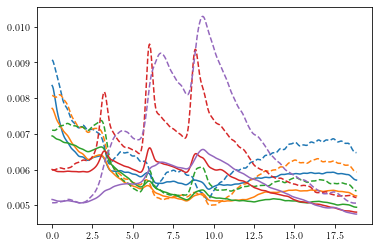

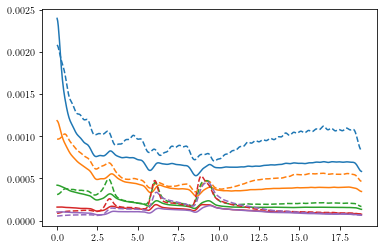

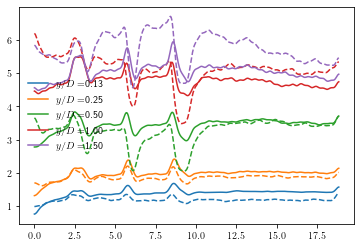

In [3]:
fig1=plt.figure()
plt.plot(x,tke[0,:],color='C0',linestyle='solid')
plt.plot(x,tke_disc[0,:],color='C0',linestyle='dashed')

plt.plot(x,tke[1,:],color='C1',linestyle='solid')
plt.plot(x,tke_disc[1,:],color='C1',linestyle='dashed')

plt.plot(x,tke[2,:],color='C2',linestyle='solid')
plt.plot(x,tke_disc[2,:],color='C2',linestyle='dashed')

plt.plot(x,tke[3,:],color='C3',linestyle='solid')
plt.plot(x,tke_disc[3,:],color='C3',linestyle='dashed')

plt.plot(x,tke[4,:],color='C4',linestyle='solid')
plt.plot(x,tke_disc[4,:],color='C4',linestyle='dashed')

fig2=plt.figure()
plt.plot(x,diss[0,:],color='C0',linestyle='solid')
plt.plot(x,diss_disc[0,:],color='C0',linestyle='dashed')

plt.plot(x,diss[1,:],color='C1',linestyle='solid')
plt.plot(x,diss_disc[1,:],color='C1',linestyle='dashed')

plt.plot(x,diss[2,:],color='C2',linestyle='solid')
plt.plot(x,diss_disc[2,:],color='C2',linestyle='dashed')

plt.plot(x,diss[3,:],color='C3',linestyle='solid')
plt.plot(x,diss_disc[3,:],color='C3',linestyle='dashed')

plt.plot(x,diss[4,:],color='C4',linestyle='solid')
plt.plot(x,diss_disc[4,:],color='C4',linestyle='dashed')


eps, D = 1e-4, 0.4
time_turb = tke**1.5/(diss+eps)
time_turb_disc = tke_disc**1.5/(diss_disc+eps)

fig3=plt.figure()
plt.plot(x,time_turb[0,:]/D,color='C0',linestyle='solid',label=r'$y/D=$%3.2f'%yD[0])
plt.plot(x,time_turb_disc[0,:]/D,color='C0',linestyle='dashed')

plt.plot(x,time_turb[1,:]/D,color='C1',linestyle='solid',label=r'$y/D=$%3.2f'%yD[1])
plt.plot(x,time_turb_disc[1,:]/D,color='C1',linestyle='dashed')

plt.plot(x,time_turb[2,:]/D,color='C2',linestyle='solid',label=r'$y/D=$%3.2f'%yD[2])
plt.plot(x,time_turb_disc[2,:]/D,color='C2',linestyle='dashed')

plt.plot(x,time_turb[3,:]/D,color='C3',linestyle='solid',label=r'$y/D=$%3.2f'%yD[3])
plt.plot(x,time_turb_disc[3,:]/D,color='C3',linestyle='dashed')

plt.plot(x,time_turb[4,:]/D,color='C4',linestyle='solid',label=r'$y/D=$%3.2f'%yD[4])
plt.plot(x,time_turb_disc[4,:]/D,color='C4',linestyle='dashed')

plt.legend(loc='best',frameon=False)


In [4]:
uavg,vavg,wavg = htps_turbine_reader('PSU_TSR_3',D=0.4,if_disc=False,filebase='avg',sigma_list=[5,5,5])
uavg_disc,vavg_disc,wavg_disc = htps_turbine_reader('PSU_TSR_3',D=0.4,if_disc=True,filebase='avg',sigma_list=[5,5,5])



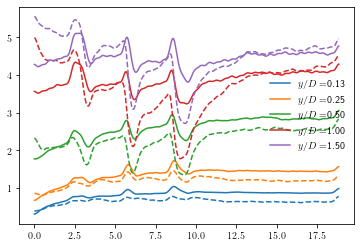

In [5]:
eps, D = 1e-4, 0.4
time_turb = tke*0.1*np.sqrt(uavg**2+0*wavg**2)/(diss+eps)
time_turb_disc = tke_disc*0.1*np.sqrt(uavg_disc**2+0*wavg_disc**2)/(diss_disc+eps)

fig3=plt.figure()
plt.plot(x,time_turb[0,:]/D,color='C0',linestyle='solid',label=r'$y/D=$%3.2f'%yD[0])
plt.plot(x,time_turb_disc[0,:]/D,color='C0',linestyle='dashed')

plt.plot(x,time_turb[1,:]/D,color='C1',linestyle='solid',label=r'$y/D=$%3.2f'%yD[1])
plt.plot(x,time_turb_disc[1,:]/D,color='C1',linestyle='dashed')

plt.plot(x,time_turb[2,:]/D,color='C2',linestyle='solid',label=r'$y/D=$%3.2f'%yD[2])
plt.plot(x,time_turb_disc[2,:]/D,color='C2',linestyle='dashed')

plt.plot(x,time_turb[3,:]/D,color='C3',linestyle='solid',label=r'$y/D=$%3.2f'%yD[3])
plt.plot(x,time_turb_disc[3,:]/D,color='C3',linestyle='dashed')

plt.plot(x,time_turb[4,:]/D,color='C4',linestyle='solid',label=r'$y/D=$%3.2f'%yD[4])
plt.plot(x,time_turb_disc[4,:]/D,color='C4',linestyle='dashed')

plt.legend(loc='best',frameon=False)


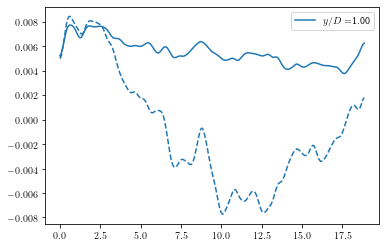

In [17]:
k=3
plt.plot(x,uvms[k,:]/D,color='C0',linestyle='solid',label=r'$y/D=$%3.2f'%yD[k])
plt.plot(x,uvms_disc[k,:]/D,color='C0',linestyle='dashed')
plt.legend(loc='best')


In [7]:
Case_list = ['PSU_NBC2','PSU_TSR_3','PSU_TSR_8']

for i,case in enumerate(Case_list):
    print(i,case)

0 PSU_NBC2
1 PSU_TSR_3
2 PSU_TSR_8


In [8]:
fig1 = plt.figure(figsize=(20,10))
for i in range(len(Case_list)):
    plt.plot([1],linestyle=linestyle[i],label=Case[i])
plt.xlim([0,19])
plt.ylim([0,5])
plt.xlabel(r'$x/D$')
plt.ylabel(r'$\mathfrak{L}/D$')



NameError: name 'linestyle' is not defined

<Figure size 1440x720 with 0 Axes>